In [78]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [79]:
# import data
fashion_mnist = keras.datasets.fashion_mnist
# load dataset
(trainX, trainy), (testX, testy) = fashion_mnist.load_data()
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [80]:
# escalate values into 0 -1 range
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')

train_images = train_images / 255
test_images = test_images / 255

In [81]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [82]:
train_images.shape
len(train_labels)
test_images.shape
# len(test_labels)

(10000, 28, 28)

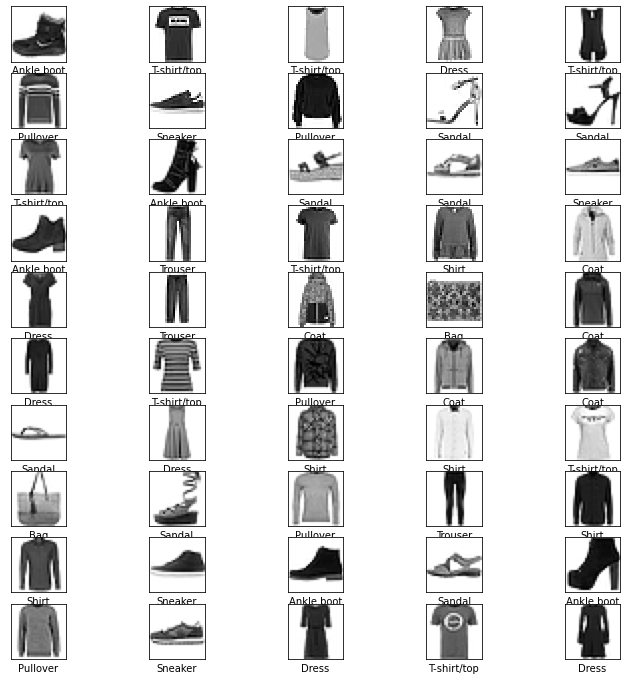

In [83]:
plt.figure(figsize=(12,12))
for i in range(50):
  plt.subplot(10, 5, i+ 1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])
plt.show()

In [86]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 10)                7850      
                                                                 
 dense_4 (Dense)             (None, 10)                110       
                                                                 
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
_________________________________________________________________


In [106]:
# optimizer with the 70%
'''
model.compile(
  optimizer='sgd',
  loss='sparse_categorical_crossentropy',
  metrics=['accuracy']
)
'''

model.compile(
  optimizer='adam',
  loss='sparse_categorical_crossentropy',
  metrics=['accuracy']
)

In [107]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5934 - accuracy: 0.8100
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4802 - accuracy: 0.8382
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4400 - accuracy: 0.8491
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4193 - accuracy: 0.8540
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4059 - accuracy: 0.8589


In [108]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy', test_acc)

313/313 [==============================] - 0s 871us/step - loss: 0.4429 - accuracy: 0.8445
Test accuracy 0.8445000052452087


In [109]:
predictions = model.predict(test_images)

In [110]:
predictions[5]

array([1.6311046e-02, 9.7362703e-01, 2.9292565e-03, 6.0936590e-03,
       2.5976065e-04, 1.5401335e-04, 4.8588213e-04, 8.5692162e-05,
       4.9556620e-05, 4.0322666e-06], dtype=float32)

In [111]:
np.argmax(predictions[5])

1

In [112]:
test_labels[5]

1

In [113]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  plt.xlabel('{} {:2.0f}% ({})'.format(
    class_names[predicted_label],
    100*np.max(predictions_array),
    class_names[true_label]), color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color='#007700')
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('black')

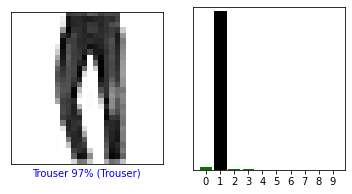

In [114]:
i = 5
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

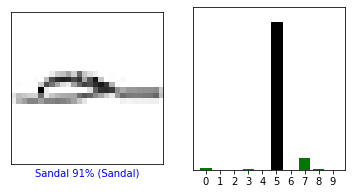

In [115]:
i = 8
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

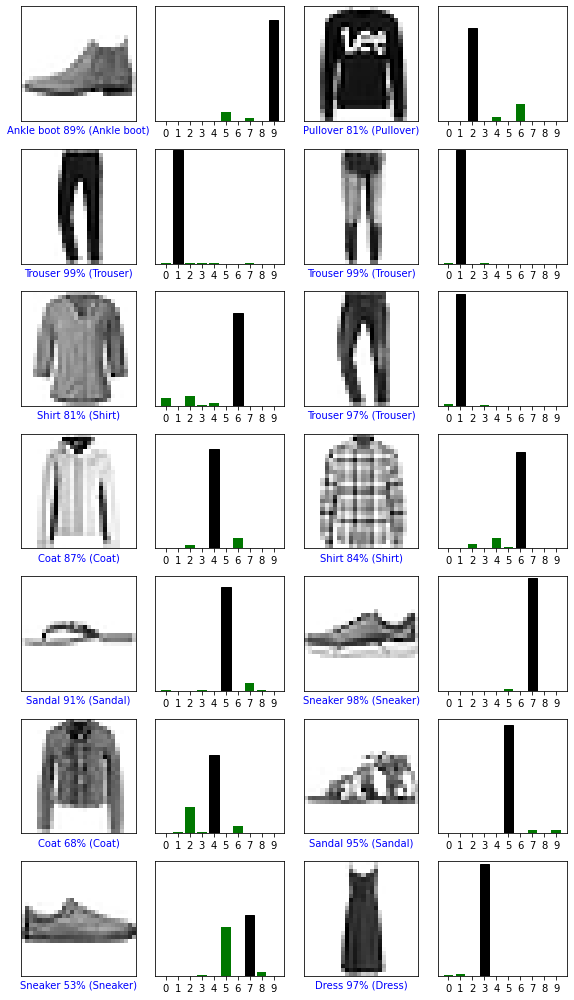

In [116]:
num_rows = 7
num_cols = 2
num_images = num_rows * num_cols
plt.figure(figsize=(2 * 2 * num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2 * num_cols, 2 * i + 1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2 * num_cols, 2 * i + 2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()